In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.stats import norm
from pandas.tools.plotting import parallel_coordinates
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!ls ../titanic/

test.csv  train.csv


In [6]:
train_data = pd.read_csv("../titanic/train.csv")
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test = pd.read_csv("../titanic/test.csv")

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Clean data by dropping columns which we are not using for visualization

In [10]:
train_data.drop(['PassengerId','Ticket'], axis=1, inplace = True)

**Feature engineering** :  Name/Title


In [11]:
train_data["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [12]:
# Get Title from Name
train_title = [i.split(",")[1].split(".")[0].strip() for i in train_data["Name"]]
train_data["Title"] = pd.Series(train_title)
train_data["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [13]:
# Get Title from Name
test_title = [i.split(",")[1].split(".")[0].strip() for i in test["Name"]]
test["Title"] = pd.Series(test_title)
test["Title"].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

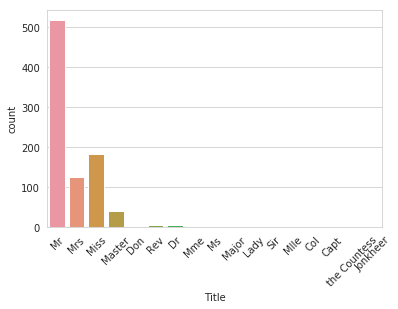

In [21]:
sns.set_style("whitegrid")
g = sns.countplot(x="Title",data=train_data)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [22]:
# Convert to categorical values Title 
train_data["Title"] = train_data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data["Title"] = train_data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
train_data["Title"] = train_data["Title"].astype(int)

In [23]:
# Convert to categorical values Title 
test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
test["Title"] = test["Title"].astype(int)

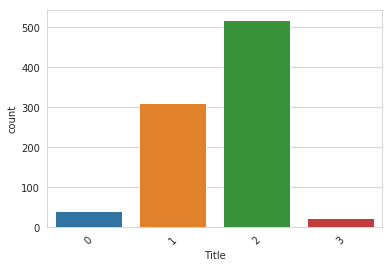

In [24]:
g = sns.countplot(x="Title",data=train_data)
g = plt.setp(g.get_xticklabels(), rotation=45) 


**Feature engineering** :  Family size

In [25]:
# Create a family size descriptor from SibSp and Parch
train_data["Family_size"] = train_data["SibSp"] + train_data["Parch"] + 1
test["Family_size"] = test["SibSp"] + test["Parch"] + 1
test["Family_size"][:5]

0    1
1    2
2    1
3    1
4    3
Name: Family_size, dtype: int64

**Dealing with Missing Data**

Check wether data have null values or not

In [26]:
train_data.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
Title            0
Family_size      0
dtype: int64

In [28]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
Family_size      0
dtype: int64

In [29]:
#Fill Embarked nan values of dataset set with 'C' most frequent value
train_data["Embarked"] = train_data["Embarked"].fillna("C")
test["Embarked"] = test["Embarked"].fillna("C")

#complete missing fare with median
train_data['Fare'].fillna(train_data['Fare'].median(), inplace = True)
test['Fare'].fillna(test['Fare'].median(), inplace = True)

## Assigning all the null values as "N"
train_data.Cabin.fillna("N", inplace=True)
test.Cabin.fillna("N", inplace=True)

In [30]:
# group by Sex, Pclass, and Title 
grouped = train_data.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
print(grouped.Age.median())
# apply the grouped median value on the Age NaN
train_data.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

Sex     Pclass  Title
female  1       1        31.0
                3        48.0
        2       1        28.0
        3       1        28.0
male    1       0         4.0
                2        36.0
                3        47.0
        2       0         1.0
                2        30.0
                3        46.5
        3       0         6.5
                2        28.0
Name: Age, dtype: float64


In [31]:
# group by Sex, Pclass, and Title 
test_grouped = test.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
print(test_grouped.Age.median())
# apply the grouped median value on the Age NaN
test.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

Sex     Pclass  Title
female  1       1        39.0
                3        39.0
        2       1        24.0
        3       1        27.0
male    1       0         9.5
                2        40.0
                3        53.0
        2       0         5.0
                2        27.0
                3        35.5
        3       0        10.0
                2        27.0
Name: Age, dtype: float64


Check whether all missing data are filled

In [32]:
train_data.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
Title          0
Family_size    0
dtype: int64

In [33]:
train_data['survived_dead'] = train_data['Survived'].apply(lambda x : 'Survived' if x == 1 else 'Dead')

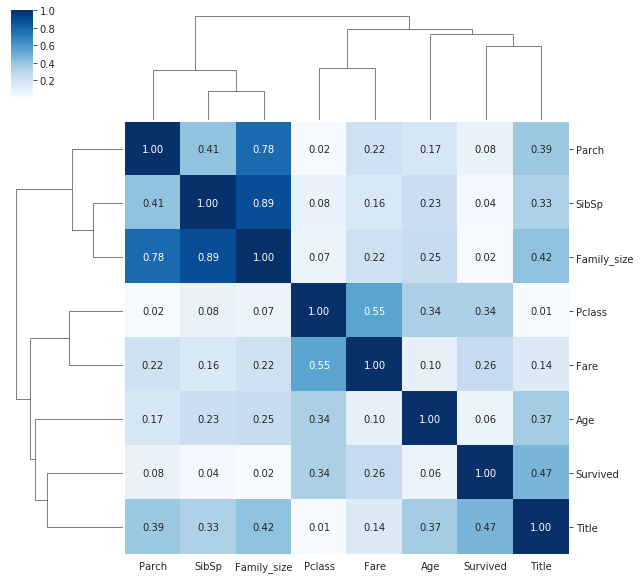

In [34]:
sns.clustermap(data = train_data.corr().abs(),annot=True, fmt = ".2f", cmap = 'Blues');

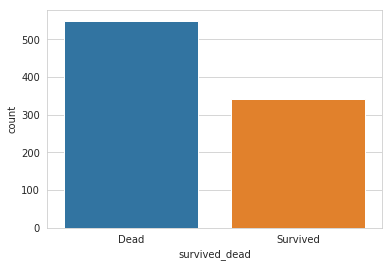

In [35]:
sns.countplot('survived_dead', data = train_data)

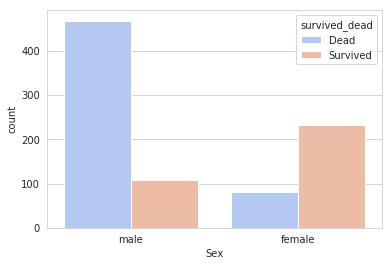

In [36]:
sns.countplot(train_data['Sex'], data = train_data, hue = 'survived_dead', palette='coolwarm')

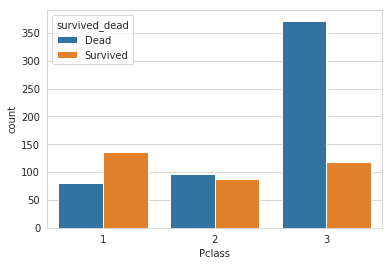

In [37]:
sns.countplot( train_data['Pclass'],data = train_data, hue = 'survived_dead')

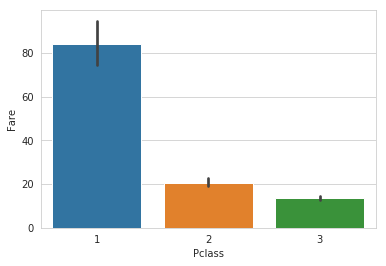

In [39]:
sns.barplot(x = 'Pclass', y = 'Fare', data = train_data);

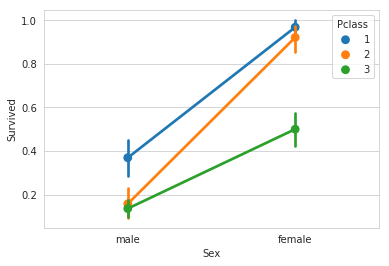

In [40]:
sns.pointplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = train_data);

Fare - Passenger Fare
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

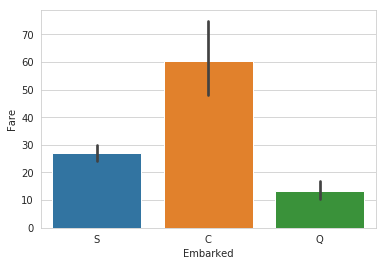

In [42]:
sns.barplot(x  = 'Embarked', y = 'Fare', data = train_data);

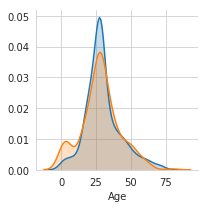

In [44]:
g = sns.FacetGrid(train_data, hue='Survived')
g.map(sns.kdeplot, "Age",shade=True);

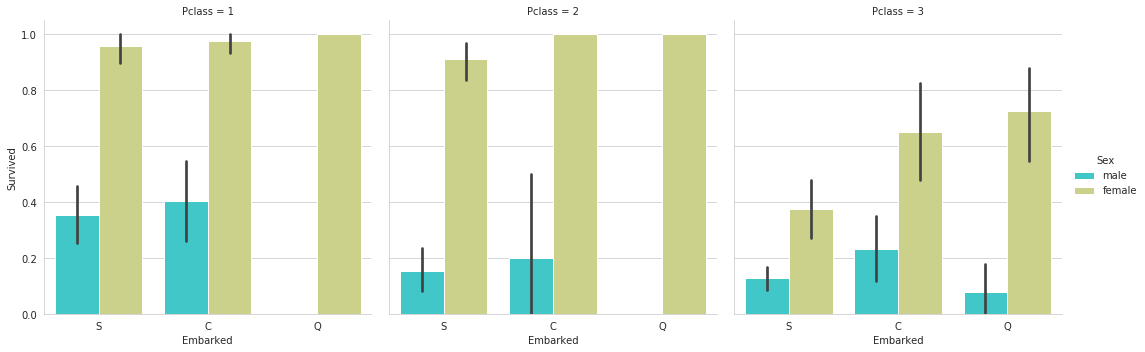

In [46]:
sns.catplot(x="Embarked", y="Survived", hue="Sex",
            col="Pclass", kind = 'bar',data=train_data, palette = "rainbow");

sibsp - Number of Siblings/Spouses Aboard



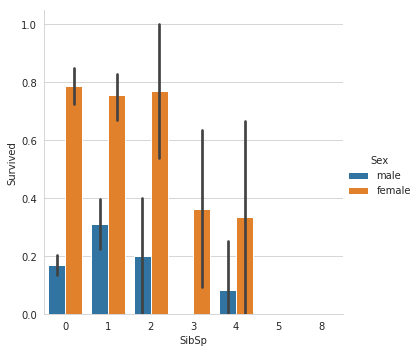

In [47]:
sns.catplot(x='SibSp', y='Survived',hue = 'Sex',data=train_data, kind='bar');

parch - Number of Parents/Children Aboard

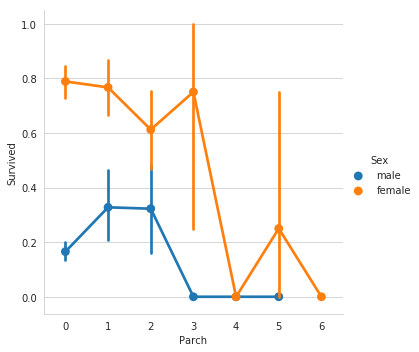

In [48]:
sns.catplot(x='Parch', y='Survived',hue = 'Sex',data=train_data, kind='point');

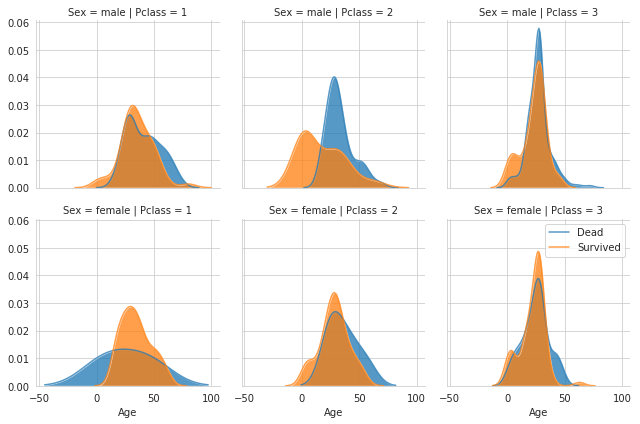

In [49]:
g= sns.FacetGrid(data = train_data, row = 'Sex', col = 'Pclass', hue = 'survived_dead')
g.map(sns.kdeplot, 'Age', alpha = .75, shade = True)
plt.legend();

In [50]:
categoricals = train_data.select_dtypes(exclude=[np.number])
categoricals.describe()

,Name,Sex,Cabin,Embarked,survived_dead
count,891,891,891,891,891
unique,891,2,148,3,2
top,"Pekoniemi, Mr. Edvard",male,N,S,Dead
freq,1,577,687,644,549


In [51]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

lbl = LabelEncoder() 
lbl.fit(list(train_data['Embarked'].values)) 
train_data['Embarked'] = lbl.transform(list(train_data['Embarked'].values))
lbl.fit(list(test['Embarked'].values)) 
test['Embarked'] = lbl.transform(list(test['Embarked'].values))

In [52]:
def encode(x): return 1 if x == 'female' else 0
train_data['enc_sex'] = train_data.Sex.apply(encode)
test['enc_sex'] = test.Sex.apply(encode)

In [53]:
train_data["has_cabin"] = [0 if i == 'N'else 1 for i in train_data.Cabin]
test["has_cabin"] = [0 if i == 'N'else 1 for i in test.Cabin]

In [54]:
from collections import Counter
# Outlier detection 

def detect_outliers(train_data,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train_data,2,["Age","SibSp","Parch","Fare"])

In [57]:
print(len(train_data.loc[Outliers_to_drop]))
train_data.loc[Outliers_to_drop].head() # Show the outliers rows

25


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family_size,survived_dead,enc_sex,has_cabin
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,N,2,0,5,Dead,0,0
16,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.1250,N,1,0,6,Dead,0,0
119,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,31.2750,N,2,1,7,Dead,1,0
164,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,39.6875,N,2,0,6,Dead,0,0
268,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,153.4625,C125,2,1,2,Survived,1,1


In [58]:
# Drop outliers
train_data = train_data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [59]:
data = train_data.select_dtypes(include=[np.number])


In [60]:
y_train = train_data["Survived"]

X_train = data.drop(labels = ["Survived"],axis = 1)

In [64]:
test = test.select_dtypes(include=[np.number])
test = test[X_train.columns] 

In [65]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

test = sc.transform(test)

In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [67]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
model.predict(test)

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Additionally, basic EDA can be done automatically via pandas profiling:

In [71]:
train_initial = pd.read_csv("../titanic/train.csv")

In [72]:
import pandas_profiling
train_initial.profile_report()